## Customer Segmentation

## Problem Statement

A United Kingdom (UK)-based online retail shop wants to maximize sales, so it decides to study its customers' behavior and segment them appropriately to improve targe marketing.

## Objective
Using the RFM modeling and a machine learning algorithm (KMeans Clustering) in Python, Segment the customers base on their transaction behaviour.

### Outline of Tasks
* [Import the necessary packages and data](#Import-the-necessary-packages-and-data)
* [Cohort Analysis](#Cohort-Analysis)
* [Prepare the data for the KMeans model (Data cleaning, Feature Engineering etc)](#Prepare-The-Data-for-The-KMeans-Model)
* [Create the KMeans Model](#Create-the-KMeans-Model)
* [Building Customer Personnas](#Building-Customer-Personnas-Metrics)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Discussion of Findings and advice to management](#Discussion-of-Findings-and-Advice)

### Import the necessary packages and data

In [1]:
# Import the necessary packages for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Import the data

data = pd.read_csv('Group3-data.csv',parse_dates=['InvoiceDate'], encoding='unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Create the a copy of the dataframe(df)

retail = data.copy()

In [4]:
# Find the Overview of the data set

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Find the total number of missing values in each column

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Remove the missing values in CustomerID
retail = retail.dropna(subset=["CustomerID"])

In [7]:
# check if the missing values have been indeed removed
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Find the summary statistics of the non-object data types
retail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


The summary indicates,that the maximum for quantity bougth and unit price are 80995 and 38970 respectively whiles the minimum price for the quantity bought was -80995 and the minimum unit price is zero. 

##### Remove the all negative and zero values for the quantity and unitprice

In [9]:
# Filter all quantity with zero and negative values, and store it as negative quantity
neg_qty = retail[retail["Quantity"]<=0]

# remove negative values of the quantity
retail = retail.drop(neg_qty.index)

# Filter all prices with  zero and negative values, and store it as negative price
neg_price = retail[retail["UnitPrice"]<=0]

# remove zero and negative values of UnitPrice
retail = retail.drop(neg_price.index)

In [10]:
# Check for the summary statistics again
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Cohort Analysis
[Return to outline of task](#Outline-of-Tasks)

In [11]:
# import datatime
import datetime as dt

# create a function that will extract the year,month, and first day in that month
def get_date(x):
    return dt.datetime(x.year, x.month, 1)

In [12]:
# Extract the year,month and the firtst day of the month from the InvoiceDate,and assign it to the new column called InvoiceMonth
retail['InvoiceMonth'] = retail['InvoiceDate'].apply(get_date)

# verify if the InvoiceMonth column has been added
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [13]:
# Group the df data by the customerID and extract the invoicemonth from it, assign to grouping
grouping = retail.groupby('CustomerID')['InvoiceMonth']

# Find the earliest date  each customer went to the online shop, and add a new column to df named CohortMonth
retail['CohortMonth'] = grouping.transform('min')

# Find the last five entries of the data and check if the CohortMonth has been added to the df data
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [14]:
# Now create a function to extract the int year and month.
def int_date(df, col):
    # Extract the year
    year = df[col].dt.year
    # Extract the month
    month = df[col].dt.month
    # Extract the day
    day = df[col].dt.day
    #output the year, month and day
    return year, month, day

In [15]:
# Apply the int_date function to InvoiceMonth
invoice_year, invoice_month, _ = int_date(retail, "InvoiceMonth")

In [16]:
# Also, apply the int_date function to CohortMonth
cohort_year, cohort_month, _ = int_date(retail, "CohortMonth")

In [17]:
# Now find the difference in years
year_diff = invoice_year - cohort_year

# find the difference in months
month_diff = invoice_month - cohort_month

In [18]:
# add a new column called cohortindex by adding the year_diff and month_diff, and add 1 indicating 1 for the month of onboarding
retail['CohortIndex'] = year_diff*12 + month_diff+1

# check if CohortIndex has been added to df data
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [19]:
# Group the data by cohortmonth and cohortindex, and extract the customerid, and assign it as cohort_data
cohort_data = retail.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

# display the cohort_data
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [20]:
# reshape the cohort_data using pivot function, and assign it to cohort count

cohort_count = cohort_data.pivot(index = "CohortMonth",
                                columns="CohortIndex",
                                values="CustomerID")

# display the cohort_count data
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Find the rentention rate of the cohort_count


In [21]:
# Divide each row by the number of customers in the first onboarding month and assign it to rentation_rate
retention_rate = (cohort_count.divide(cohort_count.iloc[:,0],axis=0)).round(2)
retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01-01,1.0,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12,NaN
2011-02-01,1.0,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07,NaN,NaN
2011-03-01,1.0,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09,NaN,NaN,NaN
2011-04-01,1.0,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.19,0.17,0.17,0.21,0.23,0.26,0.10,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.17,0.16,0.26,0.23,0.33,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.18,0.21,0.22,0.27,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.21,0.25,0.24,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now present the retention_rate in a visual form for better clarity and understanding

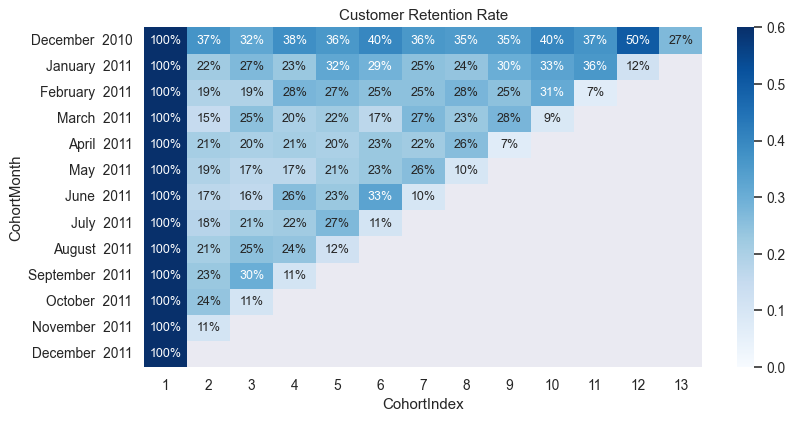

In [22]:
# Create a figure to create the chart, and specify the size of the chart
plt.figure(figsize=(10,5),dpi=90)

# transform the index names
retention_rate.index = retention_rate.index.strftime("%B  %Y")

# Create a heatmap chart for the retention rate
sns.heatmap(data = retention_rate, annot=True, fmt=".0%", vmin=0, vmax=0.6, cmap="Blues")

# Give title to the chart
plt.title("Customer Retention Rate", size=12)

# Display the chart
plt.show()

The customer retention rate chart indicates that there is very low retention rate of customer on the online shop. The highest rate is 50% which occures only once on the 12th month after the first onboarding time in December 2010.

##### Find the average quantity of product bought by each group

In [23]:
# group the df data by the cohortmonth and cohort index, and extract the quantity and assign it to cohort_quantity variable
cohort_quantity = retail.groupby(["CohortMonth","CohortIndex"])["Quantity"].mean().reset_index().round()

# find out the first five rows of cohort_quantity
cohort_quantity.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,12.0
1,2010-12-01,2,16.0
2,2010-12-01,3,16.0
3,2010-12-01,4,16.0
4,2010-12-01,5,14.0


In [24]:
# Reshape the cohort_quantity data using pivot and name 
cohort_quantity = cohort_quantity.pivot(index= "CohortMonth",
                                       columns="CohortIndex",
                                       values="Quantity")

# display the reshaped cohort_quantity
cohort_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,12.0,16.0,16.0,16.0,14.0,15.0,16.0,16.0,18.0,18.0,19.0,13.0,15.0
2011-01-01,17.0,13.0,13.0,15.0,13.0,15.0,15.0,15.0,12.0,11.0,9.0,10.0,NaN
2011-02-01,11.0,14.0,19.0,12.0,12.0,12.0,14.0,13.0,11.0,12.0,13.0,NaN,NaN
2011-03-01,10.0,12.0,13.0,10.0,14.0,13.0,13.0,14.0,11.0,9.0,NaN,NaN,NaN
2011-04-01,10.0,10.0,10.0,12.0,12.0,9.0,10.0,9.0,7.0,NaN,NaN,NaN,NaN
2011-05-01,11.0,10.0,14.0,13.0,11.0,9.0,11.0,110.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,11.0,15.0,11.0,14.0,11.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.0,14.0,7.0,8.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


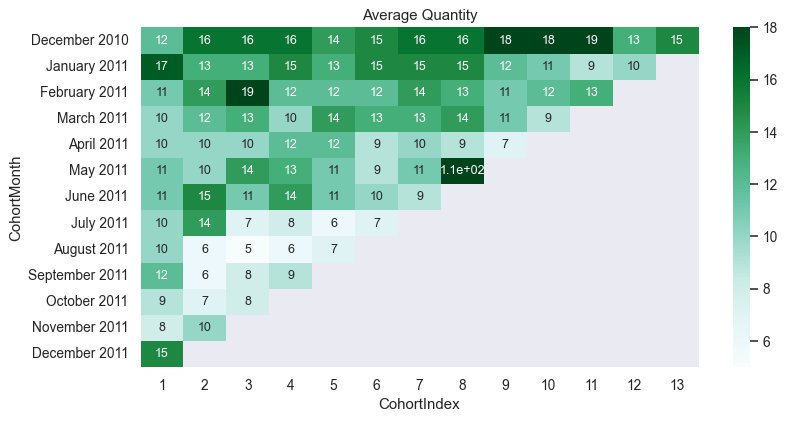

In [25]:
# Create an empty figure and create the chart in with the specified size
plt.figure(figsize=(10,5),dpi=90)

# formate the index name 
cohort_quantity.index = cohort_quantity.index.strftime("%B %Y")

# Visualize the chart using a chart
sns.heatmap(data = cohort_quantity, annot=True, vmin=5, vmax=18, cmap="BuGn" )

# Give title to the chart
plt.title("Average Quantity")
plt.show()

From the Average Quantity chart above, It could be seen that the average quantity of products bought kept on increasing after the first month of acquisition by the customers. So though the customers kept on churning, the few who remained active increased their purchase. Unfortunatly, after June 2011, the active customers reduced the quantity of products they bought from the online shop.

### Customer Segmentation
It's now known that majority of the customers churn after their first time of acquisition. fortunatly, the few customers who kept on patronising from the online shop increase their quantity of product bought. Now the customers have to be segmented based on their recency, frequency and monetary to know the most active customers, and those who have been inactive.

### Prepare The Data for The KMeans Model
[Return to outline of tasks](#Outline-of-Tasks)


In [26]:
# Create a new column with the name Date
retail['Date'] = retail['InvoiceDate'].dt.date
retail['Date']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Date, Length: 397884, dtype: object

In [27]:
# Create a new column with name Sales which is the product of quntity and Unit pricce

retail['Sales']= retail['Quantity']*retail['UnitPrice']

In [28]:
# Find the statistical information for columns with numerical data types

retail.describe()

,Quantity,UnitPrice,CustomerID,CohortIndex,Sales
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,5.145882,22.397000
std,179.331775,22.097877,1713.141560,3.853413,309.071041
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,2.000000,1.250000,13969.000000,1.000000,4.680000
50%,6.000000,1.950000,15159.000000,4.000000,11.800000
75%,12.000000,3.750000,16795.000000,8.000000,19.800000
max,80995.000000,8142.750000,18287.000000,13.000000,168469.600000


In [29]:
# Extract the month from the invoiceDate, and add it to the data
retail['MonthName'] = retail['InvoiceDate'].dt.month_name()
retail['Month'] = retail['InvoiceDate'].dt.month

In [30]:
# Order the data according to the time (Date) the transaction occurred

retail['Date'] =retail['Date'].sort_values()

In [31]:
# Find out the first 5 rows of the data to see truly if the data is sorted by InvoiceDate

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Date,Sales,MonthName,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,15.30,December,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,22.00,December,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12


In [32]:
# show the last five rows of the data set

retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Date,Sales,MonthName,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,2011-12-09,10.20,December,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,2011-12-09,12.60,December,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12-09,16.60,December,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12-09,16.60,December,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5,2011-12-09,14.85,December,12


In [33]:
# Set a snapshot date and name it current_date
current_date = '2011-12-10'

# Convert the date to datetime
current_date =pd.to_datetime(current_date)
type(current_date)

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
# Convert the date to datetime data type

retail['Date'] = pd.to_datetime(retail['Date'])
retail['Date'].dtypes

dtype('<M8[ns]')

In [35]:
# Create a new data call grouped_data by grouping the customerID and find the aggregate of invoiceDate, Sales and InvoiceNo

grouped_data = retail.groupby('CustomerID').agg({'Date':lambda x:(current_date - x.max()).days,
                                 'Sales':'sum',
                                 'InvoiceNo':'nunique',
                                'UnitPrice':'sum'})
# Display the first three rows of the group_data
grouped_data.head(3)

,Date,Sales,InvoiceNo,UnitPrice
CustomerID,,,,
12346.0,326,77183.60,1,1.04
12347.0,3,4310.00,7,481.21
12348.0,76,1797.24,4,178.71


In [36]:
# change the column names of the grouped_data

grouped_data= grouped_data.rename({'Date':'Recency',
                    'Sales':'Monetary',
                    'InvoiceNo':'Frequency'}, axis=1)
grouped_data

,Recency,Monetary,Frequency,UnitPrice
CustomerID,,,,
12346.0,326,77183.60,1,1.04
12347.0,3,4310.00,7,481.21
12348.0,76,1797.24,4,178.71
12349.0,19,1757.55,1,605.10
12350.0,311,334.40,1,65.30
...,...,...,...,...
18280.0,278,180.60,1,47.65
18281.0,181,80.82,1,39.36
18282.0,8,178.05,2,62.39


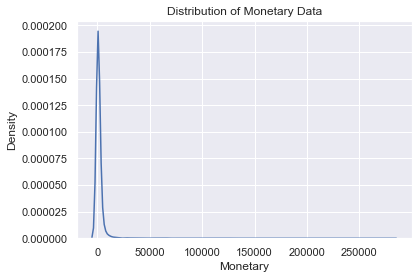

In [37]:
# Find the distribution of monetary data column of the grouped_data 

sns.kdeplot(data=grouped_data, x='Monetary')

# Give title to the distribution plot
plt.title("Distribution of Monetary Data")
plt.show()

It can be seen that the monetary data distribution is highly skewed to the right.

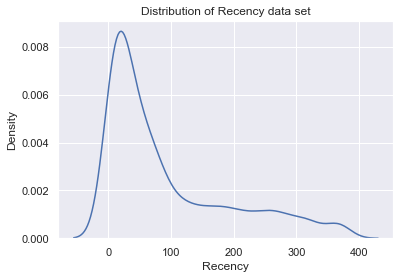

In [38]:
# Find the distribution of the Recency column

sns.kdeplot(data = grouped_data, x='Recency')

# Give title to the distribution of the Recency dataset
plt.title("Distribution of Recency data set")

plt.show()

We can also see that the recency data set is skewed to the right.

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

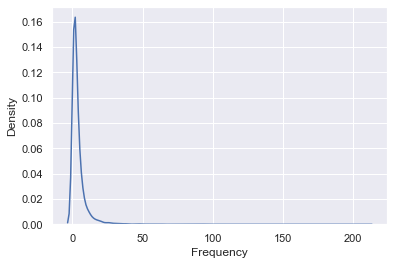

In [39]:
# Finaly let me find the distribution of the Frequency data set

sns.kdeplot(data = grouped_data, x='Frequency')

In [40]:
# Find out the number of rows in grouped_data

len(grouped_data)

4338

In [41]:
#Extract all those with zero recency 

clear = grouped_data[grouped_data['Recency']<=0]

In [42]:
# Extract All with monetary equal or less than 0.00

drop = grouped_data[grouped_data['Monetary']<=0.00]

In [43]:
# Remove all those with negative or zero monetary value

grouped_data.drop(drop.index, inplace=True)

In [44]:
# Remove those with zero recency

grouped_data.drop(clear.index, inplace =True)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

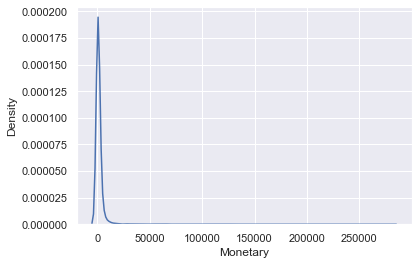

In [45]:
# Let me check if the data distribution is still skewed after removing the negative and zero numbers.

sns.kdeplot(data = grouped_data, x='Monetary')

In [46]:
grouped_data

,Recency,Monetary,Frequency,UnitPrice
CustomerID,,,,
12346.0,326,77183.60,1,1.04
12347.0,3,4310.00,7,481.21
12348.0,76,1797.24,4,178.71
12349.0,19,1757.55,1,605.10
12350.0,311,334.40,1,65.30
...,...,...,...,...
18280.0,278,180.60,1,47.65
18281.0,181,80.82,1,39.36
18282.0,8,178.05,2,62.39


In [47]:
# IN order to avoid multicolinarity, let me remove the unit price column from the data.

selected_features =grouped_data.drop('UnitPrice',axis=1)

**NOTE:**

For the KMeans model to perform well in clustering the customers, the data should should be normally distributed or the skewness should be minimal. For this reason, I will transform the using square root function from numpy to reduce the skewness of the distribution of each colomn.

In [48]:
# Transform the data so as to normalize its distribution using square root, store it as cluster_data

cluster_data = np.sqrt(selected_features)
#display the cluster_data
cluster_data

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,18.055470,277.819366,1.000000
12347.0,1.732051,65.650590,2.645751
12348.0,8.717798,42.393867,2.000000
12349.0,4.358899,41.923144,1.000000
12350.0,17.635192,18.286607,1.000000
...,...,...,...
18280.0,16.673332,13.438750,1.000000
18281.0,13.453624,8.989994,1.000000
18282.0,2.828427,13.343538,1.414214


In [49]:
# Reset the index

cluster_data=cluster_data.reset_index()
cluster_data.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,18.055470,277.819366,1.000000
1,12347.0,1.732051,65.650590,2.645751
2,12348.0,8.717798,42.393867,2.000000
3,12349.0,4.358899,41.923144,1.000000
4,12350.0,17.635192,18.286607,1.000000


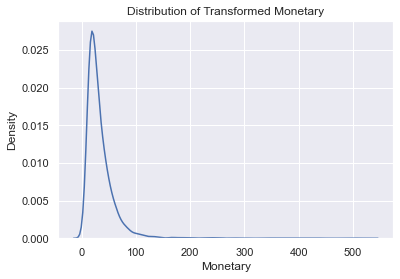

In [50]:
# Now let me check for the distribution of the monetary data

sns.kdeplot(data = cluster_data, x='Monetary')
# Give title to the density plot
plt.title("Distribution of Transformed Monetary")
plt.show()

We can see that the skewness has now reduced significantly, making the data fit for the KMeans model.

Text(0.5, 1.0, 'Distribution of transformed Recency')

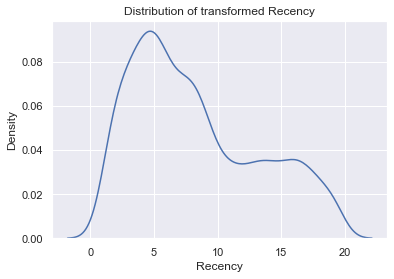

In [51]:
# check also for the distribution of the Recency distribution after transforming the data.

sns.kdeplot(data=cluster_data, x='Recency')
# Give title to the density plot for Recency
plt.title("Distribution of transformed Recency")

It can be seen that the skewness for recency has also reduced significantly.

### Create the KMeans Model
[Return to Outline of tasks](#Outline-of-Tasks)

In [52]:
# Import the Sklearn packages for the model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
# instantiate the StandardScaler

scaler = StandardScaler()

In [54]:
# Fit the scaler to the cluster_data
scaler.fit(cluster_data)

# Now scale the data, and assign it to a scale_data variable
scale_data = scaler.transform(cluster_data)

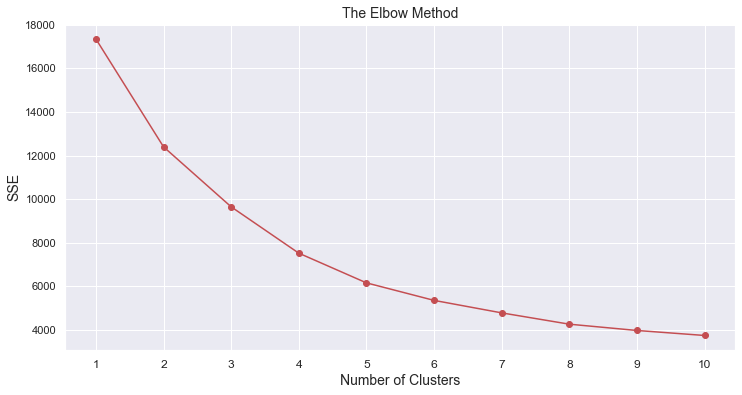

In [55]:
# Let create an empty list with the name sse
sse = []

# Create a for loop
for k in  range(1,11):
    
    # Instantiate the KMeans Algorithm
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit The Model To The Data
    model.fit(scale_data)
    
    # Find The inertia of each number of cluster(s)
    inertia = model.inertia_
    
    # Append The Inertia Values To The Empty List
    sse.append(inertia)
    
# Now Let plot the various K values against the sse
plt.figure(figsize=(12,6))
plt.plot(range(1,11), sse, marker='o', color='r')

# Name the x and y axis, and list the xticks
plt.xlabel('Number of Clusters', size=14)
plt.ylabel('SSE', size = 14)
plt.xticks(range(1,11), size=12)

# Give a title to the plot
plt.title('The Elbow Method', size=14);

In [56]:
# From the elbow method, I would like to use 3 n_cluster for the clustering

# create the final model with the name kmeans
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the final model (kmeans) to the data
kmeans.fit(scale_data)

# Predict the output of the model.
label = kmeans.labels_

In [57]:
label

array([0, 0, 2, ..., 2, 0, 2])

In [58]:
# Now add the labels to the grouped_data

grouped_data['Label']= label
grouped_data.head(10)

,Recency,Monetary,Frequency,UnitPrice,Label
CustomerID,,,,,
12346.0,326,77183.60,1,1.04,0
12347.0,3,4310.00,7,481.21,0
12348.0,76,1797.24,4,178.71,2
12349.0,19,1757.55,1,605.10,2
12350.0,311,334.40,1,65.30,1
12352.0,37,2506.04,8,1354.11,2
12353.0,205,89.00,1,24.30,1
12354.0,233,1079.40,1,261.22,1
12355.0,215,459.40,1,54.65,1


In [59]:
# Select the first three colors in the list of colors

blue,gold,green = sns.color_palette('bright')[:3]

# Select the red color as well

red = sns.color_palette('bright')[3]


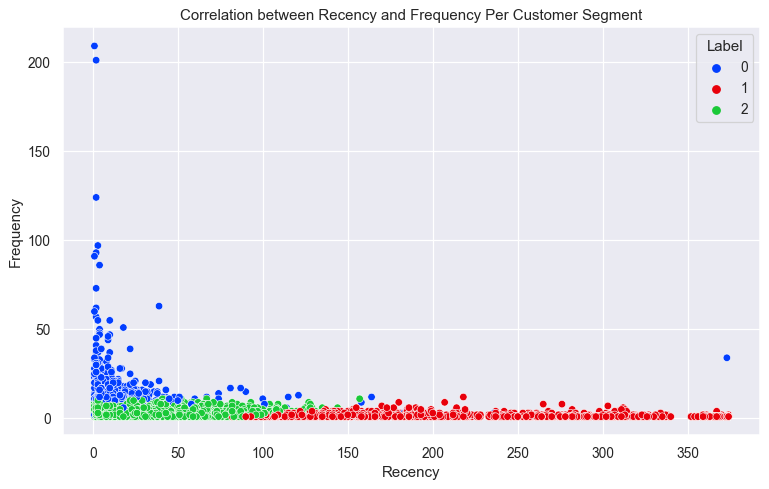

In [60]:
# Plot a scatterplot between Frequency and Recency, and seperate it according to the customer segment

# create the figure and size for the plot.
plt.figure(figsize=(10,6),dpi=90)

# Create the scatterplot and separate them with the blue, red and green color based on the customer segment
sns.scatterplot(data=grouped_data, x='Recency', y='Frequency', hue='Label', palette = ([blue,red,green]))

# Give title to the plot
plt.title("Correlation between Recency and Frequency Per Customer Segment");


1. From the scatter plot, the blue colour represent customers in label 0, and the the red color represent those in label 1 whiles the green color represent those in label 2. 
2. Customers in segment 0 are seen as those who go to the online shop more often and for that matter are those who recently visited the shop. Customers in segment 2 have visited the shop recently but have not been coming back most often. Moreover, it has been a long time customers in segment 1 last visited the online shop in the past year.
3. We can deduce that customers in group 0 are the most loyal customers of the retail shop. Also, it can be said of those in group 2 are those who have newly come to the shop. With those in group 1, these are the customers who visited the shop one or two times and never came back within the past year.


### Building Customer Personnas Metrics
[Return to outline of task](#Outline-of-Tasks)


The customer personna metrics will help to know the profile of each customer segment.

#### Building a snake plot metric

In [61]:
# Remove the unit price and Label from the group_data
new = grouped_data.drop(['UnitPrice','Label'], axis=1)

In [62]:
# Confirm if the unitprice and label has been removed
new.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,326,77183.60,1
12347.0,3,4310.00,7
12348.0,76,1797.24,4


In [63]:
# Subtract the mean of each data from each data item
new =new.sub(new.mean())

# Display the first three of the new data reflecting the subtraction made.
new.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,232.940526,75129.33354,-3.272015
12347.0,-90.059474,2255.73354,2.727985
12348.0,-17.059474,-257.02646,-0.272015


In [64]:
# Divide the new data set by the standard deviation and store it as normalized data
normalized_data =new.divide(new.std())

# Display the first three observations of the normalized data 
normalized_data.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,2.329120,8.357705,-0.425048
12347.0,-0.900484,0.250937,0.354376
12348.0,-0.170574,-0.028593,-0.035336


In [65]:
# reset the index so customerid is no longer  the index
normalized_data.reset_index(inplace=True)
new.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,232.940526,75129.33354,-3.272015
12347.0,-90.059474,2255.73354,2.727985
12348.0,-17.059474,-257.02646,-0.272015


In [66]:
# Now add the label to the normalized_data
normalized_data['Labels']=label

# Reshape the normalized_data by using the melt function
normalized_data=normalized_data.melt(id_vars=['CustomerID','Labels'],
        value_vars=["Recency","Monetary","Frequency"],
        value_name= "Values",
        var_name="Segments")

normalized_data.head()

,CustomerID,Labels,Segments,Values
0,12346.0,0,Recency,2.329120
1,12347.0,0,Recency,-0.900484
2,12348.0,2,Recency,-0.170574
3,12349.0,2,Recency,-0.740504
4,12350.0,1,Recency,2.179138


In [67]:
# Select colors for building the snakeplot
blue,gold,green = sns.color_palette('bright')[:3]
red = sns.color_palette('bright')[3]

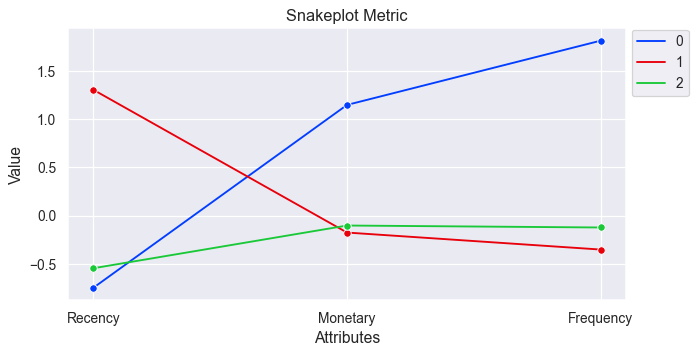

In [68]:
# Create the figure an empty figure and increase its size.
plt.figure(figsize=(8,4),dpi=90)

# Now create the snakeplot metric
sns.lineplot(data=normalized_data, x="Segments", y="Values", hue="Labels",
             palette = ([blue,red,green]), ci=None,marker='o')

# Give title to the plot
plt.title("Snakeplot Metric",size=13)

# Label the x-axis
plt.xlabel("Attributes", size=12.5)

# Labe the y-axis
plt.ylabel("Value",size=12.5)

# Set legend to be at the top-right side of the snakeplot
plt.legend(loc=(1.01,0.75))
plt.show()

From the snakeplot metric above, customers in segment 0 which is represented by the blue line have the highest monetary and frequency, and the least recency value. Customer segment represented by the red line has the least monetary and frequency as well as having the highest value for recency. Their real values are found in the summary statistics metric below. 

#### Building Summary Statistics Metric

In [69]:
# Let me create a table grouping the customers by the Label column, and assign it to the summary_data

summary_data = grouped_data.groupby('Label').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round()

summary_data

Recency Frequency Monetary      
         mean      mean     mean count
Label                                 
0        18.0      18.0  12376.0   429
1       224.0       2.0    489.0  1323
2        39.0       3.0   1143.0  2586

1. From the summary_data, Label 0 customers visited the online shop an average of 18 days during the year. The retail shop made an average sales of £12376 from them within the same time period. However, the number of customers from label 0 are not as many (429) as customers in Label 1 and 2 who are made up of 1323 and 2586 respectively.
2. Also, customers from Label 1 had the second largest number of 1323. Unfortunatly, the company had the least sales(£489) from them within the year.They also, visited the shop on an average of about 2 days, and again, the last time a customer from label 1 returned to the retail shop was about 224 days on the average.
3. Moreover, customers in label 2, had the largest segment size of 2586.The company had the second largest sales of £1143 from them.They came to the online shop an average of 3 times within the period of December, 2010 - December, 2011.

### Exploratory Data Analysis
[Return to the outline](#Outline-of-Tasks)

In [70]:
# Reset the index of the grouped_data 
grouped_data = grouped_data.reset_index()

# Extract only the CustomerID and Label, and assign it to the variable cluster.
cluster =grouped_data[['CustomerID','Label']]

# Rename the names of the categories in the Label column
cluster['Label']=cluster['Label'].map({1:'bronze',0:'gold', 2:'silver'})


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_11720\2048674702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Label']=cluster['Label'].map({1:'bronze',0:'gold', 2:'silver'})


#### Join the new customer segment to the original data

In [71]:
# Now merge the cluster data to the original data (retail)
final_data =pd.merge(left=retail,right=cluster, how="inner", on="CustomerID")

final_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Date,Sales,MonthName,Month,Label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,15.30,December,12,gold
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12,gold
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,22.00,December,12,gold
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12,gold
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,20.34,December,12,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-01,2011-12-01,1,2011-12-09,15.00,December,12,silver
397880,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-01,2011-12-01,1,2011-12-09,10.20,December,12,silver
397881,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-01,2011-12-01,1,2011-12-09,10.20,December,12,silver
397882,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-01,2011-12-01,1,2011-12-09,24.96,December,12,silver


In [72]:
# Let me find out if missing values exist.
final_data.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
InvoiceMonth    0
CohortMonth     0
CohortIndex     0
Date            0
Sales           0
MonthName       0
Month           0
Label           0
dtype: int64

In [73]:
# Export the final data to my local folder
final_data.to_csv("customer_segment.csv")

In [74]:
# Find the total sales made by each customer segment in their respective countries, and assign it to the variable country_sales

country_sales = final_data.pivot_table(index="Country", 
                                       columns="Label", 
                                       values="Sales",
                                       aggfunc="mean").round(2)
# Find the first three observations from the country_sales data
country_sales.head(3)

Label,bronze,gold,silver
Country,,,
Australia,54.07,145.73,24.01
Austria,35.94,NaN,22.48
Bahrain,32.26,NaN,NaN


In [75]:
# Find the number of missing values

country_sales.isnull().sum()

Label
bronze     5
gold      19
silver    11
dtype: int64

In [76]:
# Fill the missing values with zero
country_sales = country_sales.fillna(0)

# Show the first three observations
country_sales.head(3)

Label,bronze,gold,silver
Country,,,
Australia,54.07,145.73,24.01
Austria,35.94,0.00,22.48
Bahrain,32.26,0.00,0.00


#### Plot a stack graph for the sales by country and find out the contributions of each customers segmentation in the country

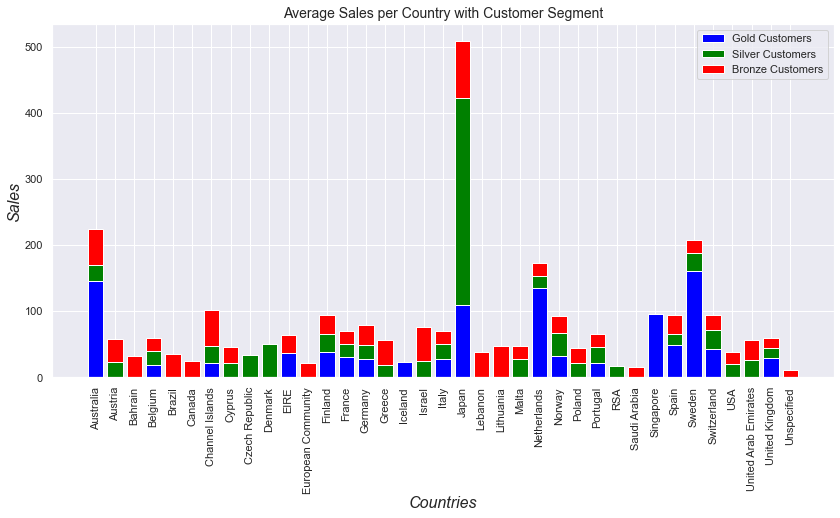

In [77]:
# Create an empty figure and increase its size
plt.figure(figsize=(14,6.5))
# Create the first bar for the gold customers
plt.bar(country_sales.index,country_sales['gold'], width=0.8,color="blue", label="Gold Customers")
# Add the silver customer to the bars
plt.bar(country_sales.index, country_sales['silver'], bottom=country_sales['gold'],color='green', width=0.8,label="Silver Customers")
# Add the bronze customer to the bars
plt.bar(country_sales.index, country_sales['bronze'],width=0.8, bottom = country_sales['gold']+country_sales['silver'], 
        color="red", label='Bronze Customers')

# Let the positions of the bar names be vertical
plt.xticks(rotation=90)
# Name the the x-axis as countries
plt.xlabel('Countries',size=16, labelpad=2.2, fontdict={"fontstyle":'oblique'})
# Name the y-axis as sales
plt.ylabel("Sales", size=16, labelpad=2.2, fontdict={"fontstyle":'oblique'})
# Give title to the chart
plt.title("Average Sales per Country with Customer Segment", size=14)
# Show the legend of the chart
plt.legend()
# Print out the chart
plt.show()

1. It can be seen from the graph above that, Japan has the highest mean sales followed by Australia whiles those from the unspecified countries are the least.
2. The Australian, Dutch and Swedish markets are dorminated by gold customers. The Japanis market is more dorminated by the silver customers.
3. Singapore is made up of only gold customers. Also,countries such as Czech Rep., Denmark and Russia are made up of only silver customers.Again, Bahrain, Brazil, Canada, the European Community, Lebanon, Lithuania and Saudi Arabia are all made up of the bronze customers.

In [78]:
# Find the sales made in each month by the various customer segmentation

monthly_sales = final_data.pivot_table(index=['Month', 'MonthName'],
                      columns= 'Label',
                      values='Sales',
                      aggfunc='sum').round(2)

monthly_sales

,Label,bronze,gold,silver
Month,MonthName,,,
1,January,66467.47,385269.06,117708.51
2,February,62169.28,259021.27,125946.80
3,March,87113.48,345557.40,162829.88
4,April,69627.42,263765.01,135807.93
5,May,90245.75,397685.98,190662.83
6,June,56745.20,426734.93,177733.56
7,July,66533.98,366851.93,166705.10
8,August,52626.52,397202.99,195514.39
9,September,9035.84,533789.75,410012.79


In [79]:
# reset the index of the monthly sales data

monthly_sales= monthly_sales.reset_index()
monthly_sales

Label,Month,MonthName,bronze,gold,silver
0,1,January,66467.47,385269.06,117708.51
1,2,February,62169.28,259021.27,125946.80
2,3,March,87113.48,345557.40,162829.88
3,4,April,69627.42,263765.01,135807.93
4,5,May,90245.75,397685.98,190662.83
5,6,June,56745.20,426734.93,177733.56
6,7,July,66533.98,366851.93,166705.10
7,8,August,52626.52,397202.99,195514.39
8,9,September,9035.84,533789.75,410012.79
9,10,October,NaN,578100.74,461218.05


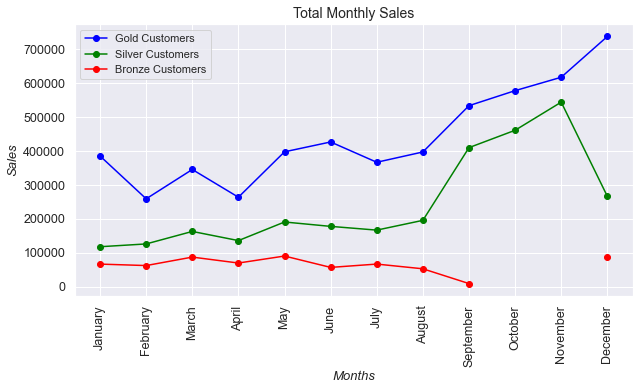

In [80]:
# plot the monthly sales of each of the customer groupings in a line chart form.
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['MonthName'],monthly_sales['gold'], marker='o', color='blue',label='Gold Customers')
plt.plot(monthly_sales['MonthName'],monthly_sales['silver'],marker='o', color='green', label='Silver Customers')
plt.plot(monthly_sales['MonthName'], monthly_sales['bronze'], marker='o', color='red', label='Bronze Customers')

# label the x and y-axis
plt.xlabel('Months',size=13, fontdict={'fontstyle':'oblique'})
plt.ylabel('Sales', size=13, fontdict={'fontstyle':'oblique'})
# Let the month names be vertical, and increase their size to 12.5
plt.xticks(rotation=90,size=12.5)
# Increase the fontsize of the sales values
plt.yticks(size=12.5)
# Give a title to the diagram
plt.title('Total Monthly Sales', size=14)

# Introduce the legends
plt.legend()
# Print the chart
plt.show()

1. In the monthly sales diagram, the blue,green and red lines represent the monthly sales made by the gold, silver and bronze customers respectively.
2. The gold and bronze customers made their highest sales in the month of December, whiles, the silver customers made their highest sales in November. The gold customers made their lowest sales in the month of February. The silver customers made their lowest sales in January whiles the bronze customers made no sales in October and November.

### Discussion of Findings and Advice
[Return to Outline](#Outline-of-Tasks)

#### Findings from Cohort Analysis
* It was found that the company has very low customer retention rate. Almost all the various cohorts had less than 50% active members after their month of onboarding. It was only the December, 2010 cohort who had 50% of their members being active on the 12th month after their onboarding month.
* Regarding the quantity bought,majority of the cohorts bought more quantity of goods on the average than they did in their acquistion month. On the contrary, January 2011 and July 2011 to October 2011 cohorts bought less goods in the subsequent months than what they bought in their month of acquisition.


#### Findings from Customer Segments
1. The model predicted three customer segments. It was obtained that customers in segment 0 were the customers who make the highest sales for the shop. They were the customers who frequently went to the online shop. For this reason I gave them the name gold customers.
2. The customers in segment 2 were the second highest sales-making customers. They had been to the online shop recently but have not been to the shop frequently. Thus, was given Silver customers.
3. Segment 1 customers made the least sales, they were the customers to go to the shop the least of times, but had the largest size, and were named bonze customers.
4. The Japanese market made the highest sales and are largely populated by silver customers, followed by the gold customers. Countries like Nethlands, Australia and Sweden are largely made up of gold customers. Russia, Denmark and Czech Republic are all made up of silver customers.Also, countries such as; Bahrain, Brazil, Canada, the European Community, Lebanon, Lithuania and Saudi Arabia are all made up of the bronze customers.
5. Lastly it was found that silver customers made their highest sales in the month of November whiles the gold and bronze  customers made their highest sales in December. The gold customers made their lowest sales in February whiles the silver customers made the lowest sales in January. The bronze customers made no sales in October and November.


#### Advice
* The online shop should request customers to give review whenever they(customers) visit the shop. This will help the company to know the challenges customers face when they come to the shop online, and address them (challenges) appropriatly. This will help reduce the high churnning of their customers.
* The company should introduce incentives to reward their faithful customers (Gold customers).
* The company should also introduce sales promotions to encourage silver customers to visit the shop often. Most of them are found in Japan,Russia, Denmark and Czech Republic.
* Finally e-mail messages can be sent to the bronze customers to find out why it took them such a long time to return to the shop. They are mostly found in Brazil, Bahrain, Canada, the European Community, Lebanon,Lithuania and Saudi Arabia.
* It is also advised that when the online retail shop is making advertisement, they should do it in November and December since all the three customer segments made their highest sales in the month of November and December.

### THANK YOU